In [107]:
from IPython.display import Image
%config InlineBackend.figure_format='retina'


In [108]:
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def norm(x, x0, sigma):
    return np.exp(-0.5 * (x - x0) ** 2 / sigma ** 2)

def sigmoid(x, x0, alpha):
    return 1. / (1. + np.exp(- (x - x0) / alpha))
    
# define the curves
x = np.linspace(0, 1, 100)
y_mlp = np.sqrt(norm(x, 0.7, 0.05)) * 0 + 1 * ( sigmoid(x, 0.2, 0.05))

y_transformer = 1.3 * ( sigmoid(x, 0.5, 0.1))


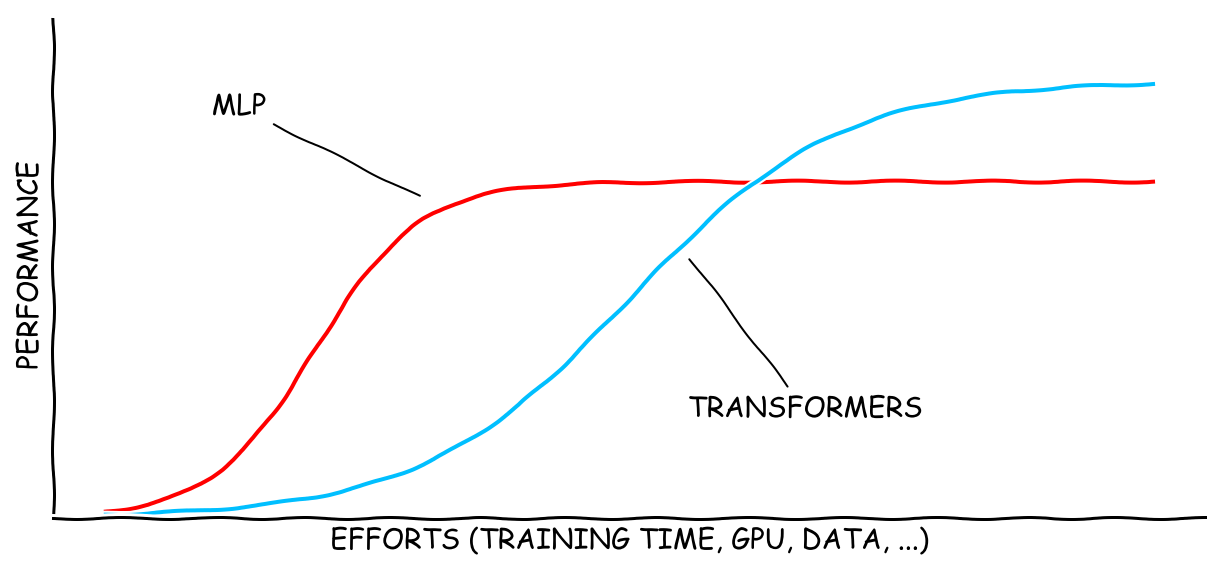

In [122]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_ylim([-30, 10])
    ax.set_ylim(0, 1.5)


    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'TRANSFORMERS',
        xy=(55, 0.78), arrowprops=dict(arrowstyle='-', linewidth=1), xytext=(55, 0.3))
    ax.annotate(
        'MLP',
        xy=(30, 0.95), arrowprops=dict(arrowstyle='-'), xytext=(10, 1.2))

#     ax.plot(data)
    ax.plot(y_mlp, 'r')
    ax.plot(y_transformer, 'deepskyblue')

    ax.set_xlabel('EFFORTS (TRAINING TIME, GPU, DATA, ...)')
    ax.set_ylabel('PERFORMANCE')
#     fig.text(
#         0.5, 0.85,
#         'The Return on Investment of MLP vs Transformers',
#         ha='center')